# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Anita\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


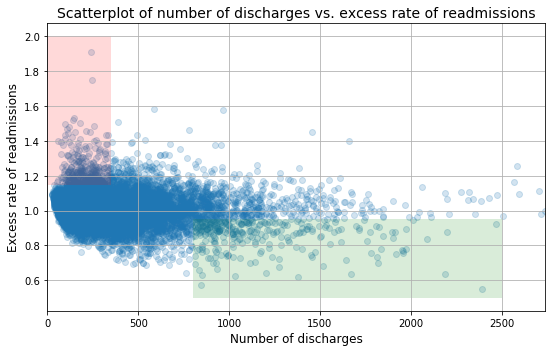

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Do you agree with the above analysis and recommendations? Why or why not?

### Overall, rate of readmissions is trending down with increasing number of discharges

There does seem to be fewer excess readmission ratios that exceed 1.2 as the number of discharges increase.  However, the bulk of observations are generally centered around a ratio of 1.0.  So it is difficult to tell for sure.  It would be good to check the correlation coefficient between these two variables and also perform a linear regression and see from the slope just how much the ratio would change for a given increase in number of discharges. 

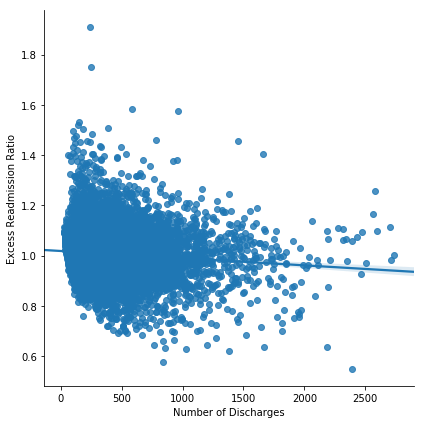

In [6]:
# Grabbing only clean data
clean_hospital_read_df = clean_hospital_read_df[81:-3]

# Plotting discharges vs excess readmission ratio
sns.lmplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df, height=6, aspect=1)

In [7]:
# Calculating the correlation coefficient 
x = list(clean_hospital_read_df['Number of Discharges'])
y = list(clean_hospital_read_df['Excess Readmission Ratio'])
correlation = np.corrcoef(x, y)[0, 1]
print('The correlation coefficient between the number of discharges and the excess readmission ratio is ' + str(round(correlation, 3)) + '.')

The correlation coefficient between the number of discharges and the excess readmission ratio is -0.093.


In [8]:
# Calculating the slope  between discharges and excess readmission ratio
slope, intercept = np.polyfit(x, y, 1)
print('For an increase in 100 discharges, there is a decrease in the excess readmission ratio of ' + str(round(-100 * slope, 4)) + '.')

For an increase in 100 discharges, there is a decrease in the excess readmission ratio of 0.0029.


The above plot shows that there is a negative trend in excess readmission rate as the number of discharges increases.  However, the relationship is weak between these two variables given the correlation is only -0.093. The slope is also quite small, so an increase in the number of discharges by 100 would only decrease the excess readmission ratio by 0.0029. 

### With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red) 
### With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

There is a higher concentration of higher excess readmission ratios when the number of discharges is low, but it may not be by as much as the analyst thinks since there are only 2 occurences of significantly higher rates of readmission.  Remove those, and that red box is cut in half.  

It appears that there is quite a high concentration of low (<1) ratios when the number of discharges is low, especially when discharges are less than 750.  There are a few instances of lower ratios (~0.6), but about half of the observations from the 800-2500 range of discharges have a ratio greater than or close to 1.0.  

In [9]:
# Adding a column to the clean_hospital dataframe. It will say whether or not the excess readmission ratio was greater/less than 1
for lab, row in clean_hospital_read_df.iterrows():
    if row['Excess Readmission Ratio'] > 1: 
        clean_hospital_read_df.loc[lab, 'Ratio Greater/Less than 1'] = 'Greater than 1'
    elif row['Excess Readmission Ratio'] < 1: 
        clean_hospital_read_df.loc[lab, 'Ratio Greater/Less than 1'] = 'Less than 1'
    elif row['Excess Readmission Ratio'] == 1: 
        clean_hospital_read_df.loc[lab, 'Ratio Greater/Less than 1'] = 'Equal to 1'
    else: 
        clean_hospital_read_df.loc[lab, 'Ratio Greater/Less than 1'] = 'NaN'

In [10]:
# Splitting into 2 groups based on number of discharges
hospital_100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 100]  # hospitals with less than or equal to 100 discharges
hospital_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= 1000] # hospitals with more than or equal to 1000 discharges

# Getting the fraction of ratios that are greater than 1
low_discharge_frac = np.sum(hospital_100['Ratio Greater/Less than 1'] == 'Greater than 1') / len(hospital_100)
high_discharge_frac = np.sum(hospital_1000['Ratio Greater/Less than 1'] == 'Greater than 1') / len(hospital_1000)

# Getting the average excess readmission ratio for each group
low_discharge_mean = np.mean(hospital_100['Excess Readmission Ratio'])
high_discharge_mean = np.mean(hospital_1000['Excess Readmission Ratio'])

Text(0,0.5,'PDF')

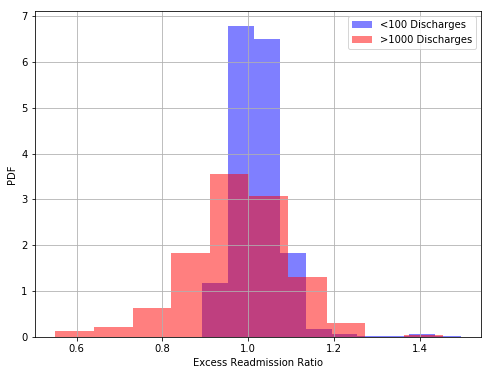

In [11]:
# plotting overlaying PDFs of each group
hospital_100['Excess Readmission Ratio'].hist(color='blue', alpha=0.5, density=True, figsize=(8, 6))
hospital_1000['Excess Readmission Ratio'].hist(color='red', alpha=0.5, density=True, figsize=(8,6))
plt.legend(('<100 Discharges', '>1000 Discharges'))
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('PDF')

Average Excess Readmission Ratio for hospitals with less than 100 discharges:  1.022
Average Excess Readmission Ratio for hospitals with more than 1000 discharges:  0.979
Fraction of Excess Readmission Ratios Greater than 1 for hospitals with less than 100 discharges:  0.626
Fraction of Excess Readmission Ratios Greater than 1 for hospitals with more than 1000 discharges:  0.445


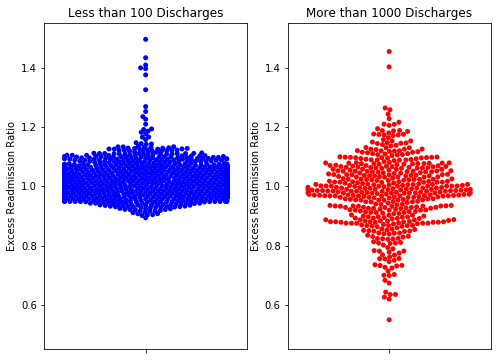

In [12]:
# plotting swarmplots of each group
fig, axes = plt.subplots(1, 2, figsize = (8,6))

sns.swarmplot(y=hospital_100['Excess Readmission Ratio'], color='blue', ax=axes[0])
sns.swarmplot(y=hospital_1000['Excess Readmission Ratio'], color='red', ax=axes[1])

axes[0].set_ylim([0.45, 1.55])
axes[0].set_title('Less than 100 Discharges')
axes[1].set_ylim([0.45, 1.55])
axes[1].set_title('More than 1000 Discharges')

print('Average Excess Readmission Ratio for hospitals with less than 100 discharges: ', round(low_discharge_mean, 3))
print('Average Excess Readmission Ratio for hospitals with more than 1000 discharges: ', round(high_discharge_mean, 3))
print('Fraction of Excess Readmission Ratios Greater than 1 for hospitals with less than 100 discharges: ', round(low_discharge_frac, 3))
print('Fraction of Excess Readmission Ratios Greater than 1 for hospitals with more than 1000 discharges: ', round(high_discharge_frac, 3))

The average excess readmission ratio and the fraction of ratios greater than 1 is higher for hospitals with less than 100 discharges. Looking at the PDF, hospitals with more than 1000 discharges have more of a spread towards smaller ratios while hospitals with less than 100 discharges are concentrated between ratios of 0.9-1.1.  There is, however,  a lot of overlap between the two groups.  In the swarmplot, we see that for hospitals with less than 100 discharges, the ratio does not dip below 0.9 and there are some ratios that exceed 1.2.  For hospitals with more than 1000 discharges, there is more of a spread, especially for ratios less than 0.9, but there are still a few ratios above 1.2.  We can say that for hospitals with more discharges, there are more occurrences of lower ratios (less than 0.9), but still the bulk of the ratios are close to and above 1.  There are a few more observations with ratios greater than 1.2 for hospitals with less than 100 discharges, but the number of them is not significantly larger when compared to hospitals with more than 1000 discharges. The number of discharges overall seems to have an effect on the excess readmission ratio, but there must be other factors at play since there is such an overlap between them.  

## In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 

## In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

These numbers have already been verified above.  I will perform a hypothesis test utilizing bootstrap replicates to see if the calculated values for hospitals with discharges less than 100 was just a fluke.  Also, I will perform a two sample t-test to compare the means of the two groups of hospitals and and a proportions z-test to compare the fractions of ratios that are greater than 1.  The t-test is used to compare the means because I am not assuming equal population variance for the two groups. 

Null Hypothesis: The number of discharges for a hospital does not have any bearing on the excess readmission ratio. 

In [13]:
# Defining functions
def calc_frac(data):
    return np.sum(data == 'Greater than 1') / len(data)

def bootstrap_replicate_1d(data, func, size):
    """Draws one bootstrap replicate"""
    return func(np.random.choice(data, size))
    
def draw_bs_reps(data, func, size1=1, size2=1):
    """Draw bootstrap replicates"""
    bs_replicates = np.empty(size1)
    for i in range(size1):
        bs_replicates[i] = bootstrap_replicate_1d(data, func, size2)
    return bs_replicates

In [14]:
# Combining hospital_100 and hospital_10000
hospitals = pd.concat([hospital_100, hospital_1000])

size = len(hospital_100) # how many excess readmission ratios to choose

In [15]:
# Drawing bootstrap replicates on the excess readmission ratio
bs_replicates_mean = draw_bs_reps(hospitals['Excess Readmission Ratio'], np.mean, 10000, size)

# Calculate p-value
p_mean = np.sum(bs_replicates_mean >= low_discharge_mean) / len(bs_replicates_mean)

In [16]:
# Drawing bootstrap replicates on if the excess readmission ratio was greater than or less than 1
bs_replicates_frac = draw_bs_reps(hospitals['Ratio Greater/Less than 1'], calc_frac, 10000, size)

# Calculate p-value
p_frac = np.sum(bs_replicates_frac >= low_discharge_frac) / len(bs_replicates_frac)

In [17]:
# Performing t-test
from scipy.stats import ttest_ind

t_stat, p_t = ttest_ind(a=hospital_100['Excess Readmission Ratio'], b=hospital_1000['Excess Readmission Ratio'], equal_var=False)
print('t-statistic: ', t_stat)
print('p-value: ', p_t/2) # dividing by 2 because two-tailed p-value was given

t-statistic:  7.4212188299234105
p-value:  2.2449128513306142e-13


In [18]:
# Performing proportions z-test
from statsmodels.stats.proportion import proportions_ztest

mask_100 = hospital_100['Ratio Greater/Less than 1'] == 'Greater than 1'
mask_1000 = hospital_1000['Ratio Greater/Less than 1'] == 'Greater than 1'

z_stat, p_z = proportions_ztest(count=[len(hospital_100[mask_100]), len(hospital_1000[mask_1000])], nobs=[len(hospital_100), len(hospital_1000)], value=0)
print('z-statistic: ', z_stat)
print('p-value: ', p_z/2) # dividing by 2 because two-tailed p-value was given

z-statistic:  6.726661588992386
p-value:  8.679992242973865e-12


p-value:  0.0


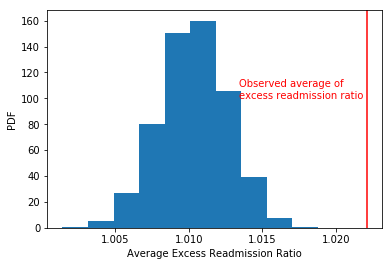

In [19]:
# Plotting PDF of the bs_replicates for the average excess readmission ratio
_ = plt.hist(bs_replicates_mean, density = 1)
_ = plt.axvline(x = low_discharge_mean, color = 'r')
_ = plt.text(1.0134, 100, 'Observed average of \nexcess readmission ratio', color = 'r')
_ = plt.xlabel('Average Excess Readmission Ratio')
_ = plt.ylabel('PDF')
print('p-value: ', p_mean)

p-value:  0.0


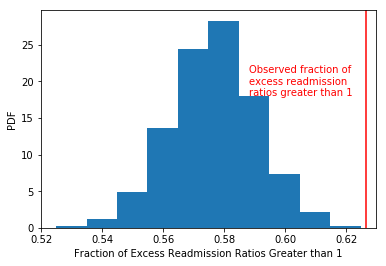

In [20]:
# Plotting PDF of the bs_replicates for the fraction of excess readmission ratios greater than 1
_ = plt.hist(bs_replicates_frac, density = 1)
_ = plt.axvline(x = low_discharge_frac, color = 'r')
_ = plt.text(0.588, 18, 'Observed fraction of \nexcess readmission \nratios greater than 1', color = 'r')
_ = plt.xlabel('Fraction of Excess Readmission Ratios Greater than 1')
_ = plt.ylabel('PDF')
print('p-value: ', p_frac)

In both of the above hypothesis tests, the p-values were much less than the significance level of 0.01.  So I would reject the null hypothesis that the number of discharges for a hospital does not have any bearing on the excess readmission ratio.  The two sample t-test and proportions z-test both had very small p-values which were less than the significance level.  The t-statistic and z-statistic were large, which says that the group of hospitals with less than 100 discharges is very different from the group of hospitals with more than 1000 discharges.  There is therefore some relationship between the number of discharges and the excess readmission ratio.  

## There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 

In [21]:
# Calculating the correlation coefficient 
x = list(clean_hospital_read_df['Number of Discharges'])
y = list(clean_hospital_read_df['Excess Readmission Ratio'])
correlation = np.corrcoef(x, y)[0, 1]
print('The correlation coefficient between the number of discharges and the excess readmission ratio is ' + str(round(correlation, 3)) + '.')

The correlation coefficient between the number of discharges and the excess readmission ratio is -0.093.


A correlation of -0.093 is not really significant.  I will perform a hypothesis test utilizing permutation to see if the observed correlation could be reached. 

Null Hypothesis: The number of discharges for a hospital does not have a significant correlation with the excess readmission ratio. 

In [22]:
# Defining function
def pearson_r(x, y):
    """Computes pearson correlation coefficient"""
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

In [23]:
# Drawing permutation replicates for correlation
perm_replicates = np.empty(10000)

for i in range(10000):
    discharge_permuted = np.random.permutation(clean_hospital_read_df['Number of Discharges'])
    perm_replicates[i] = pearson_r(discharge_permuted, clean_hospital_read_df['Excess Readmission Ratio'])

# Compute p-value
p_corr = np.sum(perm_replicates <= correlation) / len(perm_replicates)

p-value:  0.0


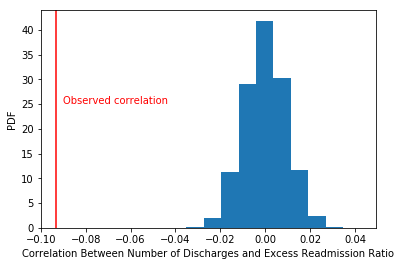

In [24]:
# Plotting PDF of the permutation replicates for the correlation
_ = plt.hist(perm_replicates, density = 1)
_ = plt.axvline(x = correlation, color = 'r')
_ = plt.text(-0.09, 25, 'Observed correlation', color = 'r')
_ = plt.xlabel('Correlation Between Number of Discharges and Excess Readmission Ratio')
_ = plt.ylabel('PDF')
print('p-value: ', p_corr)

In [25]:
# Calculating the slope  between discharges and excess readmission ratio
slope, intercept = np.polyfit(x, y, 1)
print('For an increase in 100 discharges, there is a decrease in the excess readmission ratio of ' + str(round(-100 * slope, 4)) + '.')

For an increase in 100 discharges, there is a decrease in the excess readmission ratio of 0.0029.


A p-value of 0 was calculated after performing the hypothesis test.  Therefore, I would reject the null hypothesis that the number of discharges for a hospital does not have a significant correlation with the excess readmission ratio.  There is some statistical significance to the correlation between these two variables.  However, according to the calculated slope of the regression line fitted to the observations, an increase in 100 discharges would only produce an 0.0029 decrease in the excess readmission ratio.  So although the correlation is statistically significant, it does not have much practical significance. 

## Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

There are many smaller hospitals that do not have excessive rates of readmission that are greater than 1, so the blame can't entirely be placed on smaller hospitals lacking the necessary resources. 

## Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

A lot of hospitals with smaller capacities don't have problems with excess readmissions. So a blanket recommendation of demonstrating upgraded resource allocation may not solve the problem.  Perhaps the hospital is in a poorer neighborhood where people can't afford to take time off from work to stay their full time in the hospital.  These people would then leave the hospital early, only to return when their conditions are aggravated.  In cases such as this, it may not matter how many resources the hospital has. 

## Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Just combining two badly performing hospitals won't automatically improve rates of readmissions just because their number of discharges increases. Further research needs to be done comparing small capacity hospitals that are doing well with those that aren't.  

## Conclusions and Further Analysis

The scatterplot shown at the beginning of this excercise is good because you can see the concentration of hospitals with different discharge numbers.  It is clear that most hospitals have ratios between 0.8 and 1.2.  However, it is not clear how well the two variables correlate and what the general trend is like as the number of discharges increase.  It would be helpful to add a regression line to the plot.  The below plot compares the excess readmission ratio of hospitals with less than 100 discharges and hospitals with more than 1000 discharges.  It can be seen from the plot that there are a few more higher ratios with lower capacity hospitals.  Unlike the lower capacity hospitals, several of the higher capacity hospitals have ratios less than 0.9. 

Text(0.5,1,'More than 1000 Discharges')

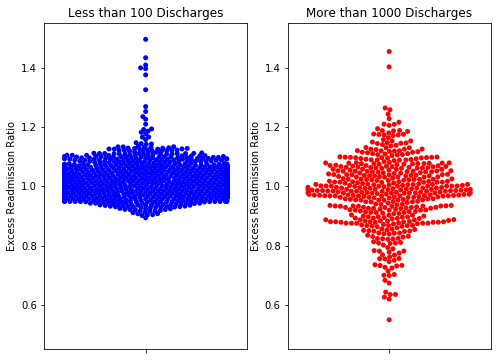

In [26]:
# plotting swarmplots of each group
fig, axes = plt.subplots(1, 2, figsize = (8,6))

sns.swarmplot(y=hospital_100['Excess Readmission Ratio'], color='blue', ax=axes[0])
sns.swarmplot(y=hospital_1000['Excess Readmission Ratio'], color='red', ax=axes[1])

axes[0].set_ylim([0.45, 1.55])
axes[0].set_title('Less than 100 Discharges')
axes[1].set_ylim([0.45, 1.55])
axes[1].set_title('More than 1000 Discharges')

In my previous analysis, it has been shown that in general, there are more instances of higher excess readmission ratios for hospitals with lower numbers of discharges. However, the number of discharges is not the only variable affecting readmission.  

In [27]:
# Getting the number of ratios less than and greater than 1 per measure 
hospital_measure = clean_hospital_read_df.pivot_table(index='Measure Name', columns='Ratio Greater/Less than 1', values='State', aggfunc=len, margins=True).fillna(0)

# Adding a column for fraction greater than 1
hospital_measure['Fraction greater than 1'] = hospital_measure['Greater than 1'] / hospital_measure['All']
hospital_measure

Ratio Greater/Less than 1,Equal to 1,Greater than 1,Less than 1,All,Fraction greater than 1
Measure Name,,,,,
READM-30-AMI-HRRP,1.0,978.0,798.0,1777,0.550366
READM-30-COPD-HRRP,4.0,1380.0,1343.0,2727,0.506051
READM-30-HF-HRRP,4.0,1435.0,1393.0,2832,0.506709
READM-30-HIP-KNEE-HRRP,0.0,754.0,615.0,1369,0.550767
READM-30-PN-HRRP,2.0,1391.0,1396.0,2789,0.498745
All,11.0,5938.0,5545.0,11494,0.516617


The above table shows that perhaps acute myocardial infarction surgeries and hip/knee surgeries could contribute to higher excess readmission ratios.  

In [28]:
# Creating masks for each measure for each group of hospitals (less than 100 discharges and more than 1000 discharges)
mask_ami_100 = hospital_100['Measure Name'] == 'READM-30-AMI-HRRP'
mask_copd_100 = hospital_100['Measure Name'] == 'READM-30-COPD-HRRP'
mask_hf_100 = hospital_100['Measure Name'] == 'READM-30-HF-HRRP'
mask_hip_100 = hospital_100['Measure Name'] == 'READM-30-HIP-KNEE-HRRP'
mask_pn_100 = hospital_100['Measure Name'] == 'READM-30-PN-HRRP'

mask_ami_1000 = hospital_1000['Measure Name'] == 'READM-30-AMI-HRRP'
mask_copd_1000 = hospital_1000['Measure Name'] == 'READM-30-COPD-HRRP'
mask_hf_1000 = hospital_1000['Measure Name'] == 'READM-30-HF-HRRP'
mask_hip_1000 = hospital_1000['Measure Name'] == 'READM-30-HIP-KNEE-HRRP'
mask_pn_1000 = hospital_1000['Measure Name'] == 'READM-30-PN-HRRP'

Text(0.5,0,'READM-30-PN-HRRP')

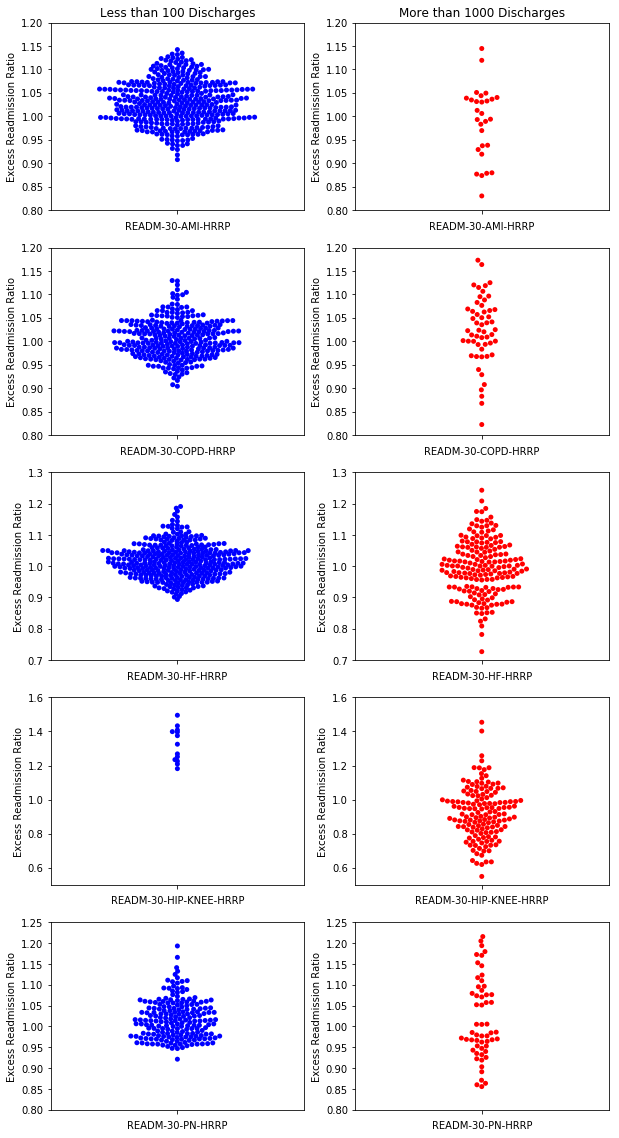

In [29]:
fig, axes = plt.subplots(5, 2, figsize = (10,20))

sns.swarmplot(y=hospital_100[mask_ami_100]['Excess Readmission Ratio'], color='blue', ax=axes[0,0])
sns.swarmplot(y=hospital_1000[mask_ami_1000]['Excess Readmission Ratio'], color='red', ax=axes[0,1])

axes[0,0].set_ylim([0.8, 1.2])
axes[0,0].set_title('Less than 100 Discharges')
axes[0,1].set_ylim([0.8, 1.2])
axes[0,1].set_title('More than 1000 Discharges')
axes[0,0].set_xlabel('READM-30-AMI-HRRP')
axes[0,1].set_xlabel('READM-30-AMI-HRRP')

sns.swarmplot(y=hospital_100[mask_copd_100]['Excess Readmission Ratio'], color='blue', ax=axes[1,0])
sns.swarmplot(y=hospital_1000[mask_copd_1000]['Excess Readmission Ratio'], color='red', ax=axes[1,1])

axes[1,0].set_ylim([0.8, 1.2])
axes[1,1].set_ylim([0.8, 1.2])
axes[1,0].set_xlabel('READM-30-COPD-HRRP')
axes[1,1].set_xlabel('READM-30-COPD-HRRP')

sns.swarmplot(y=hospital_100[mask_hf_100]['Excess Readmission Ratio'], color='blue', ax=axes[2,0])
sns.swarmplot(y=hospital_1000[mask_hf_1000]['Excess Readmission Ratio'], color='red', ax=axes[2,1])

axes[2,0].set_ylim([0.7, 1.3])
axes[2,1].set_ylim([0.7, 1.3])
axes[2,0].set_xlabel('READM-30-HF-HRRP')
axes[2,1].set_xlabel('READM-30-HF-HRRP')

sns.swarmplot(y=hospital_100[mask_hip_100]['Excess Readmission Ratio'], color='blue', ax=axes[3,0])
sns.swarmplot(y=hospital_1000[mask_hip_1000]['Excess Readmission Ratio'], color='red', ax=axes[3,1])

axes[3,0].set_ylim([0.5, 1.6])
axes[3,1].set_ylim([0.5, 1.6])
axes[3,0].set_xlabel('READM-30-HIP-KNEE-HRRP')
axes[3,1].set_xlabel('READM-30-HIP-KNEE-HRRP')

sns.swarmplot(y=hospital_100[mask_pn_100]['Excess Readmission Ratio'], color='blue', ax=axes[4,0])
sns.swarmplot(y=hospital_1000[mask_pn_1000]['Excess Readmission Ratio'], color='red', ax=axes[4,1])

axes[4,0].set_ylim([0.8, 1.25])
axes[4,1].set_ylim([0.8, 1.25])
axes[4,0].set_xlabel('READM-30-PN-HRRP')
axes[4,1].set_xlabel('READM-30-PN-HRRP')


When looking at all hospitals, acute myocardial infarction surgeries and hip/knee surgeries could possibly contribute to higher excess readmission ratios.  When comparing hospitals with less than 100 discharges and hospitals with more than 1000 discharges, there is a significant difference between hospitals using the hip-knee measure.  Special attention should therefore be paid at lower capacity hospitals regarding hip/knee surgeries to ensure that they are performed in the same manner as those in larger capacity hospitals.  It would be necessary to make sure that the same type of equipment is being used and if the lower capacity hospitals are lacking in special instruments specific to hip/knee surgeries. 

In [30]:
# Getting the number of ratios greater than 1 by state
hospital_state = clean_hospital_read_df.pivot_table(index='State', columns='Ratio Greater/Less than 1', values='Hospital Name', aggfunc=len, margins=True).fillna(0)

# Adding a column for fraction greater than 1
hospital_state['Fraction greater than 1'] = hospital_state['Greater than 1'] / hospital_state['All']
hospital_state = hospital_state.sort_values(by='Fraction greater than 1')

In [31]:
# Checking out the top 5 and bottom 5 states
print('States with the lowest fractions of excess readmission ratios greater than 1: \n', hospital_state['Fraction greater than 1'].head())
print('\nStates with the highest fractions of excess readmission ratios greater than 1: \n', hospital_state['Fraction greater than 1'].tail())

States with the lowest fractions of excess readmission ratios greater than 1: 
 State
MT    0.136364
VT    0.142857
SD    0.146341
ND    0.172414
ID    0.175000
Name: Fraction greater than 1, dtype: float64

States with the highest fractions of excess readmission ratios greater than 1: 
 State
KY    0.689796
NY    0.714771
NJ    0.758865
WV    0.779817
DC    0.862069
Name: Fraction greater than 1, dtype: float64


There is quite a big difference in the fraction of excess readmission ratios greater than 1 across the states.  Further research would have to be done with any differences in statewide hospital policies.  Or perhaps readmissions could be linked with the population density or overall wealth of the citizens.  